In [38]:
%%time
import pandas as pd
import numpy as np
import random


from numpy import genfromtxt

#import training data
df = genfromtxt('digits-training.data', delimiter=' ')
data_value=df[:,:-1]
data_target=df[:,-1]


#import test data
df1 = genfromtxt('digits-test.data', delimiter=' ')
data_value1=df1[:,:-1]
data_target1=df1[:,-1]


y_train = pd.get_dummies(data_target)  #hot encode the output data of training dataset
x_train = data_value
y_test = pd.get_dummies(data_target1)  #hot encode the output data of test dataset
x_test = data_value1

#initialize blank list
alist=[]

def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derivative(s):
    return s * (1 - s)

def softmax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

def cross_entropy(pred, real):
    n_samples = real.shape[0]
    res = pred - real
    return res/n_samples

def error(pred, real):
    n_samples = real.shape[0]
    logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss


class MyNeuralNetwork:
    def __init__(self, x, y):
        self.x = x
        neurons = 128
        print("No of neurons in hidden layer",neurons)
        self.lr = 0.05
        print("Learning Rate",self.lr)
        
        ip_dim = x.shape[1] # 64
        op_dim = y.shape[1]  # 10

        self.w1 = np.random.randn(ip_dim, neurons)
        self.b1 = np.zeros((1, neurons))
        self.w2 = np.random.randn(neurons, neurons)
        self.b2 = np.zeros((1, neurons))
        self.w3 = np.random.randn(neurons, op_dim)
        self.b3 = np.zeros((1, op_dim))
        self.y = y
        
#function to feedforward
    def feedforward(self):
        z1 = np.dot(self.x, self.w1) + self.b1
        self.a1 = sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(z2)
        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = sigmoid(z3)

#function to backpropagation

    def backprop(self):
     
        loss = error(self.a3, self.y)
        print("Error = %0.4f " % loss) 
        alist.append(loss)
        a3_delta = cross_entropy(self.a3, self.y) # w3
        z2_delta = np.dot(a3_delta, self.w3.T)
        a2_delta = z2_delta * sigmoid_derivative(self.a2) # w2
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * sigmoid_derivative(self.a1) # w1
        
        ### Update weights

        self.w3 -= self.lr * np.dot(self.a2.T, a3_delta)
        self.b3 -= self.lr * np.sum(a3_delta, axis=0, keepdims=True)
        self.w2 -= self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 -= self.lr * np.sum(a2_delta, axis=0)
        self.w1 -= self.lr * np.dot(self.x.T, a1_delta)
        self.b1 -= self.lr * np.sum(a1_delta, axis=0)
        
#function to predict the digit        
    def predict(self, data):
        self.x = data
        self.feedforward()
        return self.a3.argmax()
    
#main program    
model = MyNeuralNetwork(x_train/16.0, np.array(y_train))
epochs = 1500  #number of epochs


for x in range(epochs):
    model.feedforward()
    model.backprop()
    
#Accuracy calculation
def get_account(x, y):
    acc = 0
    for xx,yy in zip(x, y):
        s = model.predict(xx)
        if s == np.argmax(yy):
            acc +=1
    return acc/len(x)*100


#Display the results
print("EPOCHS",str(epochs))
print("Training accuracy : ", get_account(x_train/16, np.array(y_train)))
print("Test accuracy : ", get_account(x_test/16, np.array(y_test)))



No of neurons in hidden layer 128
Learning Rate 0.05
Error = 3.5071 
Error = 3.8139 
Error = 4.1601 
Error = 4.5228 
Error = 4.6600 
Error = 4.6689 
Error = 4.6124 
Error = 4.5195 
Error = 4.4053 
Error = 4.2785 
Error = 4.1447 
Error = 4.0074 
Error = 3.8693 
Error = 3.7324 
Error = 3.5983 
Error = 3.4684 
Error = 3.3438 
Error = 3.2251 
Error = 3.1130 
Error = 3.0073 
Error = 2.9079 
Error = 2.8142 
Error = 2.7258 
Error = 2.6422 
Error = 2.5631 
Error = 2.4883 
Error = 2.4176 
Error = 2.3511 
Error = 2.2887 
Error = 2.2306 
Error = 2.1765 
Error = 2.1264 
Error = 2.0801 
Error = 2.0372 
Error = 1.9974 
Error = 1.9604 
Error = 1.9260 
Error = 1.8938 
Error = 1.8637 
Error = 1.8353 
Error = 1.8085 
Error = 1.7831 
Error = 1.7590 
Error = 1.7361 
Error = 1.7142 
Error = 1.6933 
Error = 1.6732 
Error = 1.6540 
Error = 1.6355 
Error = 1.6177 
Error = 1.6005 
Error = 1.5839 
Error = 1.5679 
Error = 1.5524 
Error = 1.5373 
Error = 1.5228 
Error = 1.5086 
Error = 1.4949 
Error = 1.4815 
Err

Error = 0.3030 
Error = 0.3028 
Error = 0.3026 
Error = 0.3024 
Error = 0.3023 
Error = 0.3021 
Error = 0.3019 
Error = 0.3017 
Error = 0.3016 
Error = 0.3014 
Error = 0.3012 
Error = 0.3010 
Error = 0.3009 
Error = 0.3007 
Error = 0.3005 
Error = 0.3004 
Error = 0.3002 
Error = 0.3000 
Error = 0.2998 
Error = 0.2997 
Error = 0.2995 
Error = 0.2993 
Error = 0.2992 
Error = 0.2990 
Error = 0.2988 
Error = 0.2987 
Error = 0.2985 
Error = 0.2983 
Error = 0.2982 
Error = 0.2980 
Error = 0.2978 
Error = 0.2976 
Error = 0.2975 
Error = 0.2973 
Error = 0.2971 
Error = 0.2970 
Error = 0.2968 
Error = 0.2966 
Error = 0.2965 
Error = 0.2963 
Error = 0.2961 
Error = 0.2960 
Error = 0.2958 
Error = 0.2957 
Error = 0.2955 
Error = 0.2953 
Error = 0.2952 
Error = 0.2950 
Error = 0.2948 
Error = 0.2947 
Error = 0.2945 
Error = 0.2943 
Error = 0.2942 
Error = 0.2940 
Error = 0.2939 
Error = 0.2937 
Error = 0.2935 
Error = 0.2934 
Error = 0.2932 
Error = 0.2930 
Error = 0.2929 
Error = 0.2927 
Error = 

In [26]:
model.predict([0,0,4,11,15,16,15,0,0,0,13,13,8,13,14,0,0,0,0,0,0,15,5,0,0,0,2,4,10,15,1,0,0,0,10,16,16,16,8,0,0,0,1,13,13,1,0,0,0,0,1,16,6,0,0,0,0,0,6,14,2,0,0,0])

7

Text(0,0.5,'error')

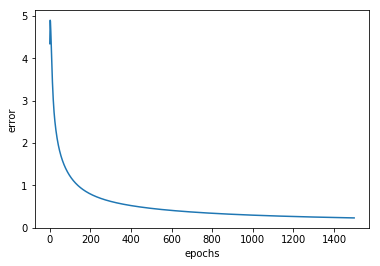

In [27]:
#Plot the Error vs Epochs
import matplotlib.pyplot as plt

x = np.arange(0, epochs, 1)
plt.plot(x,alist)
plt.xlabel('epochs')
plt.ylabel('error')


In [37]:
y_test = pd.get_dummies(data_target1)  #hot encode the output data of test dataset
y_test

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,1
